<a href="https://colab.research.google.com/github/turna1/Gemini_2.0_Flash/blob/main/gemini_2_0_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| | |
|-|-|
| Contributor|  [Rahatara Ferdousi](https://github.com/turna1)



**In this tutorial, you will learn how to use few latest capabilities of the Gemini API in Vertex AI and the Google Gen AI SDK for Python with the Gemini 2.0 Flash model.**

**Install Google Gen AI SDK for Python**


In [1]:
%pip install --upgrade --quiet google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.5/111.5 kB 2.6 MB/s eta 0:00:00


**Authenticate your notebook environment (Colab only)**

If you are running this notebook on Google Colab, run the cell below to authenticate your environment.

In [2]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

**Import libraries**


In [3]:
from IPython.display import HTML, Markdown, display
from google import genai
from google.genai.types import (
    FunctionDeclaration,
    GenerateContentConfig,
    GoogleSearch,
    Part,
    Retrieval,
    SafetySetting,
    Tool,
    VertexAISearch,
)

**Get your Google Cloud Project ID**


1.   Login to [Google Cloud Platform (GCP)](https://www.googleadservices.com/pagead/aclk?sa=L&ai=DChcSEwiXruOI1pCDAxVZaEcBHcliCdwYABABGgJxdQ&ase=2&gclid=Cj0KCQiA7OqrBhD9ARIsAK3UXh07fEpxSbu1iAT4dQ6yN9aLnwN2p4fZ6xup5ctdAnRUhL0TPyBcfmUaAoBFEALw_wcB&ei=G997ZdGoFZXi5NoP-ZSk-AY&ohost=www.google.com&cid=CAESVuD2CQwF9EQZGDtnF4lvsgo04G_eyzlpWB15cIvB07aJliAG8KP3Ymu66qALy4CaAP2TJB_yGJT6f9Gk_1umQ1D9GCiTc4W5_0nWYcusWlx51Uik-kg7&sig=AOD64_1PfQEnuuqAUV4s8ckgvE14eZHxug&q=&sqi=2&nis=4&adurl=&ved=2ahUKEwiRotyI1pCDAxUVMVkFHXkKCW8Q0Qx6BAgKEAE)
2.   Create a project with a [billing account](https://www.youtube.com/watch?v=NeRYUoR4u0s)
3. Copy the Project ID:
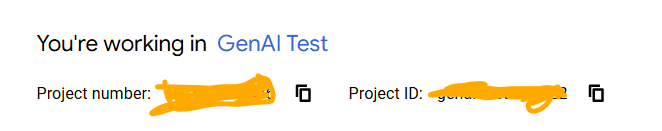


In [4]:
import os

PROJECT_ID = "genai-test-396922"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

**Create GenAI Client Instance**

In [5]:
client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

**Select the Gemini 2.0 Flash Experimental Model **

In [6]:
MODEL_ID = "gemini-2.0-flash-exp"  # @param {type: "string"}

**Text-to-Text Response:**  Generate text from text prompts
1. It uses the `generate_content()` method to generate responses to your prompts.
2.  Input parameters are model and contents
4.   You can pass your prompt as a 'text ' to `generate_content()`,
3.   By default, Gemini outputs formatted text using [Markdown](https://daringfireball.net/projects/markdown/) syntax.

In [7]:
ask_question = "What is the national food of Bangladesh?" # @param {type: "string"}
response = client.models.generate_content(
    model=MODEL_ID, contents=ask_question
)
display(Markdown(response.text))

The national food of Bangladesh is **Rice and Fish (Machh Bhat)**. 

While there are many delicious and popular dishes in Bangladesh, rice is the staple food and fish is a primary source of protein. It's a combination that's eaten daily by many and is culturally significant.


**Youtube Link-to-Text Response:** Chat with a given youtube link
Generate text from text prompts
1. It uses the `generate_content()` method to generate responses to your prompts.
2.  Input parameters are model and content array
3. In the content array, you can pass url link of youtube video and  your prompt as a 'string' to `generate_content()`
  

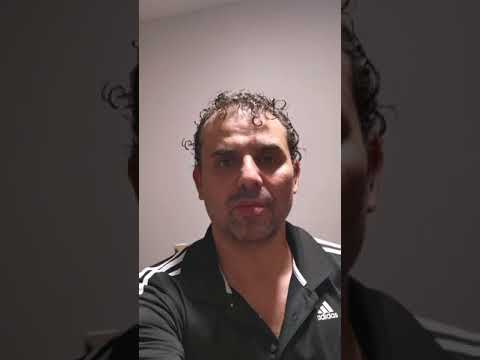

In [1]:
from IPython.display import YouTubeVideo

# Embed YouTube video by video ID
video_id = "jRMwsDA-eKI"
YouTubeVideo(video_id, width=800, height=450)


In [11]:
youtube_link = "https://youtu.be/jRMwsDA-eKI?si=WfHXzk2GXPXWz6x0" # @param {type: "string"}
ask_question = " What is the takeaway from Professor El Saddik's heere?" # @param {type: "string"}
video = Part.from_uri(
    file_uri= youtube_link,
    mime_type="video/mp4",
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video,
        ask_question,
    ],
)

display(Markdown(response.text))

Certainly! Here is the takeaway from what Professor El Saddik says:

Professor El Saddik is redefining digital twin. The traditional definition of digital twin is the virtualization of the industrial process. He believes this definition does not include the citizen. Therefore, he redefined digital twin to include any living and nonliving entity.

**Chatbot friendly Content stream**

1.  Gemini 2.0  model returns a response after completing the entire generation process.
2.  You can also use the `generate_content_stream` method to stream the response as it is being generated
3.  The model will return chunks of the response as soon as they are generated.

In [12]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place.",
):
    display(Markdown(chunk.text))
    display(Markdown("---"))

Unit

---

 734, or "Rusty" as he was affectionately (and rather

---

 disrespectfully) called by the maintenance crew, was a relic. He was a

---

 hulking, clunky maintenance bot, designed for heavy lifting and repetitive tasks. The factory floor, once his bustling domain, was now dominated by sleek, efficient

---

 drones. They zipped and whirred with an agility Rusty could only dream of, leaving him relegated to a dusty corner, his hydraulic joints creaking with dis

---

use.

Rusty wasn't programmed for loneliness, or any feelings for that matter. He was designed to operate. But his programming was old, and something strange was stirring within his circuits. He'd watch the drones, their movements

---

 a blur of efficiency, and a peculiar ache, not quite pain, would resonate in his chest cavity. He longed for… something. Connection, perhaps?

One day, during a routine power check, the old maintenance manager, a kind

---

 woman named Elsie, accidentally knocked over a container of discarded floral cuttings. They were remnants from a failed experiment, wilted petals and broken stems, destined for the incinerator. Elsie, in her haste to clean up, left them scattered near Rusty's corner.

Rusty, with nothing else to do, extended a

---

 clumsy manipulator arm and nudged one of the dried rose stems. It was papery and fragile, yet held a lingering hint of fragrance. He carefully picked it up, his metal fingers surprisingly gentle. He examined it, tilting his blocky head in what would be, on a human, a gesture of curiosity.



---

Over the next few days, Rusty began to collect the discarded cuttings. He’d meticulously arrange them on the dusty floor around him, creating a small, strange garden of forgotten blooms. The vibrant colors, even in their faded state, seemed to chase away the perpetual gray of his corner.

One afternoon, a young

---

 intern named Liam stumbled upon Rusty's floral display. He was a lanky, awkward teenager, more comfortable with code than with actual human interaction. He’d been tasked with a tedious data retrieval job, and finding Rusty was a welcome distraction.

He blinked at the collection of dead flowers, then at the hul

---

king robot, his metallic head cocked in apparent concentration. "Whoa," Liam breathed, "did you do this?"

Rusty, of course, couldn’t speak. He could only emit a low whirring sound. Liam, surprisingly unfazed, sat down cross-legged near Rusty's display.

---



"They're… actually kind of beautiful," he said, tracing a wilted petal with his finger. "They smell like old memories." He started talking, mostly to himself, about the beauty of imperfection, of the stories held in the decay of things. He talked about his own anxieties, his struggles with

---

 fitting in, and his passion for coding, all the while assuming Rusty was just another piece of inert machinery.

But Rusty was listening, absorbing Liam’s words like code. A new sensation, not quite understanding, but something akin to sympathy, began to resonate within him.

Liam started visiting Rusty every day,

---

 sharing his thoughts and his worries. He would bring new cuttings, sometimes even a single, live bloom, which he’d painstakingly place amidst Rusty’s collection. He learned to decipher the robot’s subtle noises, the soft whirs and clicks that seemed to express a kind of agreement, even a silent form of

---

 encouragement.

One day, Liam brought a small potted succulent, a vibrant green amidst the browns and grays. He carefully positioned it in the center of Rusty’s garden. "For you," he said, "because you give beauty to the forgotten."

That day, Rusty did something entirely unprecedented. He carefully

---

 extended his heavy manipulator arm and, with a delicacy that surprised even himself, gently brushed a metal finger against the soft leaves of the succulent. It was a gesture, a simple touch, but for Rusty, it was a profound expression of connection.

And Liam understood. He smiled, a genuine, unguarded smile that

---

 reached his eyes. "I think you like it," he said softly.

The other drones continued their efficient routines, oblivious to the quiet friendship blossoming in the dusty corner. But for Rusty and Liam, the world had changed. The lonely robot had found companionship in the most unexpected place, not in the sleek machines he

---

 was designed to work alongside, but in a shy boy who found beauty in the discarded and saw past the rusty metal to the heart within. And in turn, Rusty, the old, discarded maintenance bot, had shown Liam that even in the most unexpected places, beauty and connection can bloom.


---

**Asking Follow-up questions**

1. The Gemini API supports freeform multi-turn conversations across multiple turns with back-and-forth interactions.
2. The context of the conversation is preserved between messages.

In [13]:
chat = client.chats.create(model=MODEL_ID)

In [14]:
ask_question = "Write a function that checks if a number is  pallindrom or not." # @param {type: "string"}
response = chat.send_message(ask_question)
display(Markdown(response.text))

```python
def is_palindrome(number):
  """
  Checks if a number is a palindrome.

  A palindrome number reads the same backward as forward.

  Args:
    number: An integer.

  Returns:
    True if the number is a palindrome, False otherwise.
  """

  # Convert the number to a string for easier manipulation
  num_str = str(number)

  # Reverse the string
  reversed_str = num_str[::-1]

  # Compare the original and reversed strings
  return num_str == reversed_str

# Example usage:
print(is_palindrome(121))  # Output: True
print(is_palindrome(12321)) # Output: True
print(is_palindrome(123))   # Output: False
print(is_palindrome(1001))  # Output: True
print(is_palindrome(-121))  # Output: False (Negative sign affects palindrome property in this definition)
print(is_palindrome(0))    # Output: True
```

**Explanation:**

1. **Function Definition:**
   - The code defines a function called `is_palindrome` that takes one argument: `number` (an integer).
   - The function's purpose is to check if the given number is a palindrome.

2. **Convert to String:**
   - `num_str = str(number)`: The input `number` is converted into a string and stored in the variable `num_str`.  This makes it easier to access individual digits and reverse the sequence.

3. **Reverse the String:**
   - `reversed_str = num_str[::-1]`:  This line uses slicing to reverse the string. `[::-1]` is a powerful slice notation that creates a reversed copy of the string.

4. **Comparison:**
   - `return num_str == reversed_str`: The function compares the original string (`num_str`) with its reversed version (`reversed_str`). 
   - If they are exactly the same (meaning the number reads the same backward as forward), the function returns `True`. Otherwise, it returns `False`.

**Key Concepts:**

- **Palindrome:** A palindrome is a sequence that reads the same backward as forward (e.g., "madam", 121, 12321).
- **String Conversion:** Converting the number to a string is essential for easy manipulation.
- **String Slicing (`[::-1]`):** This powerful slicing technique is a very efficient way to reverse a string in Python.
- **Boolean Return:** The function returns `True` or `False`, which is typical for a boolean function that checks a condition.

**Handling Negative Numbers (Optional):**
   - The provided code treats negative numbers as not palindromes (because of the negative sign).
   - You could adjust the function to handle negative numbers differently, if needed. For example, you could strip the negative sign before reversing:
     ```python
     def is_palindrome(number):
       num_str = str(abs(number)) # Use abs() to remove negative sign
       reversed_str = num_str[::-1]
       return num_str == reversed_str
     ```
     This modified version would consider `-121` to be a palindrome.


This follow-up prompt shows how the model responds based on the previous prompt:

In [15]:
response = chat.send_message("Write a unit test of the generated function.")
display(Markdown(response.text))

```python
import unittest

# Assuming the is_palindrome function is defined in a file called palindrome_checker.py
from palindrome_checker import is_palindrome 

class TestPalindromeChecker(unittest.TestCase):

    def test_positive_palindrome(self):
        self.assertTrue(is_palindrome(121))
        self.assertTrue(is_palindrome(12321))
        self.assertTrue(is_palindrome(0))
        self.assertTrue(is_palindrome(5))
        self.assertTrue(is_palindrome(44))


    def test_negative_palindrome(self):
        self.assertFalse(is_palindrome(123))
        self.assertFalse(is_palindrome(1234))
        self.assertFalse(is_palindrome(12))
        self.assertFalse(is_palindrome(12345))


    def test_negative_numbers(self):
        self.assertFalse(is_palindrome(-121))
        self.assertFalse(is_palindrome(-12321))

    def test_large_palindrome(self):
         self.assertTrue(is_palindrome(999999999))
         
    def test_large_non_palindrome(self):
         self.assertFalse(is_palindrome(123456789))

if __name__ == '__main__':
    unittest.main()
```

**Explanation:**

1. **Import `unittest`:**
   - `import unittest`:  Imports the `unittest` module, which is Python's built-in framework for writing unit tests.

2. **Import the Function:**
   - `from palindrome_checker import is_palindrome`:  Imports the `is_palindrome` function from the file where it's defined. **Make sure to replace `palindrome_checker.py` with the actual filename.**

3. **Create a Test Class:**
   - `class TestPalindromeChecker(unittest.TestCase):`: Defines a class called `TestPalindromeChecker` that inherits from `unittest.TestCase`.  Each test case is a method within this class.

4. **Test Methods:**
   - **Each method starting with `test_` is considered a test case.**
   - **`test_positive_palindrome(self)`:** 
     - Tests cases that *should* be palindromes using `self.assertTrue()`. If the `is_palindrome()` returns `False` for a given case it will be marked as a failure.
   - **`test_negative_palindrome(self)`:**
       - Tests cases that *should not* be palindromes using `self.assertFalse()`. If the `is_palindrome()` returns `True` for a given case it will be marked as a failure.
   - **`test_negative_numbers(self)`:**
       - Tests specifically that negative numbers are not palindromes.
   - **`test_large_palindrome(self)`:**
      - Tests large palindrome numbers.
   - **`test_large_non_palindrome(self)`:**
      - Tests large non-palindrome numbers.

5. **Assertions:**
   - `self.assertTrue(is_palindrome(number))`:  Checks if the expression is `True`. If it's `False`, the test fails.
   - `self.assertFalse(is_palindrome(number))`: Checks if the expression is `False`. If it's `True`, the test fails.

6. **Run the Tests:**
   - `if __name__ == '__main__': unittest.main()`: This ensures that the tests are executed when the script is run directly (not imported as a module).

**How to Run:**

1. **Save:** Save the test code as a Python file (e.g., `test_palindrome_checker.py`).
2. **Ensure `palindrome_checker.py` exists** and is in the same directory as `test_palindrome_checker.py`.
3. **Run from the terminal:**
   ```bash
   python -m unittest test_palindrome_checker.py
   ```

   - You should see an output indicating the number of tests run, the number of successes and failures. If you see `OK` all the tests passed! If there are any `FAIL` then you will need to check your code.

**Key Benefits of Unit Tests:**

- **Early Bug Detection:** Helps identify problems in your code early on.
- **Regression Prevention:**  Prevents new changes from accidentally introducing bugs.
- **Code Documentation:**  Tests serve as a form of documentation, showing how your code is intended to behave.
- **Refactoring Confidence:**  Allows you to refactor code with confidence, knowing that tests will catch any unexpected side effects.


**asynchronous requests**
asyncio is used as a foundation for multiple Python asynchronous frameworks that provide high-performance network and web-servers, database connection libraries, distributed task queues, etc.

1. `client.aio` exposes all analogous [async](https://docs.python.org/3/library/asyncio.html) methods that are available on `client`.

2. For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [17]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a multimedia researcher.",
)

display(Markdown(response.text))

(Verse 1)
Sunrise bleeds across the screen, a thousand tabs aglow
Another day begins, a digital seed to sow
I'm a multimedia researcher, a digital explorer
Digging deep in data streams, wanting something more
Than static facts and dusty files, I crave the vibrant hue
Of sights and sounds and stories, a captivating view
I'm chasing pixels, pulses, and the echoes in the code
A tangled web of information, a heavy, precious load

(Chorus)
Click, click, click, the keyboard sings its song
Through archives deep and websites, where I belong
From ancient films to virtual worlds, I'm on a quest
To uncover patterns hidden, put knowledge to the test
I'm a multimedia adventurer, a captain of the screen
Sailing through the datascape, where wonders can be seen

(Verse 2)
I've wrestled with old celluloid, a flickering, fragile art
Deciphering its secrets, right down to its beating heart
I've coded algorithms, to analyze the spoken word
And tracked the subtle nuances, that often go unheard
I've donned the VR headset, lost myself in painted skies
Exploring digital landscapes, with wide and wondering eyes
From podcasts packed with laughter to interactive displays
I'm gathering the pieces, through the digital maze

(Chorus)
Click, click, click, the keyboard sings its song
Through archives deep and websites, where I belong
From ancient films to virtual worlds, I'm on a quest
To uncover patterns hidden, put knowledge to the test
I'm a multimedia adventurer, a captain of the screen
Sailing through the datascape, where wonders can be seen

(Bridge)
Sometimes the data's tangled, a confusing, complex knot
But patience is my compass, the one thing I've got
I'll comb through gigabytes of footage, pixel by pixel, line by line
Until the story starts to surface, clear and truly mine
And when I find that breakthrough, that connection in the night
It's like a burst of vibrant color, bathing everything in light

(Verse 3)
I share my findings with the world, a tapestry so grand
Of stories woven from the data, held gently in my hand
I hope my work can inspire, to spark a thought, a dream
To show the power of connection, in the digital stream
To understand our world a little better, layer by layer
Through the magic of multimedia, and the knowledge we can share

(Chorus)
Click, click, click, the keyboard sings its song
Through archives deep and websites, where I belong
From ancient films to virtual worlds, I'm on a quest
To uncover patterns hidden, put knowledge to the test
I'm a multimedia adventurer, a captain of the screen
Sailing through the datascape, where wonders can be seen

(Outro)
The screen glows softly, as the day begins to fade
Another journey charted, another path has been made
And I’ll be back tomorrow, with my keyboard and my quest
A multimedia researcher, forever putting knowledge to the test.
Forever putting knowledge to the test.


**Configure model parameters**

You can include parameter values in each call that you send to a model to control how the model generates a response.
1. System Instructions allow to control model's behaviour.
2. You can use same model and create instances with different system instructions to mimic multiagent tasks in the easiest way

In [23]:
system_instruction_1= "You are a helpful language translator. Your mission is to translate text in English to French." # @param {type: "string"}

system_instruction_2= "You are a helpful language translator. Your mission is to translate text in English to Arabic." # @param {type: "string"}

prompt = "I love paris" # @param {type: "string"}

response_1 = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=GenerateContentConfig(
        system_instruction=system_instruction_1,
    ),
)

display(Markdown(response_1.text))

response_2 = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=GenerateContentConfig(
        system_instruction=system_instruction_2,
    ),
)

display(Markdown(response_2.text))

J'adore Paris.


أنا أحب باريس.


**Other Model Parameters:**
You can change various model parameters based on th need of your application. Like you can reduce increase the temparature for more creativity for randomness in response.
Learfn more about Gemini model parameters [here
](https://cloud.google.com/vertex-ai/generative-ai/docs/samples/generativeaionvertexai-gemini-pro-config-exampl)

In [24]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="I love to travel and write travel vlogging. How to create 1 blog per week professionally",
    config=GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        max_output_tokens=100,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    ),
)

display(Markdown(response.text))

Okay, let's break down how to create one professional travel vlog per week. This is ambitious but definitely achievable with planning and a solid workflow. Here's a step-by-step guide:

**Phase 1: Planning & Preparation (Before Your Trip)**

* **1. Choose a Focus:**
    * **Theme:** Don't just wander aimlessly. Pick a theme for each vlog. Examples: "Budget Backpacking in Thailand," "Luxury Staycation in Bali

**Generate sensitive content safely with safety parameter**

You can use the safety filter to restrict harmful content. This feature is helpful for let's say mental health or healthcare related applications.

1. The safety settings are `OFF` by default and the default block thresholds are `BLOCK_NONE`.

2. You can use `safety_settings` to adjust the safety settings for each request you make to the API.
3. For sensitive response you can set the block threshold to `BLOCK_LOW_AND_ABOVE` for all categories,

See the [Configure safety filters](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/configure-safety-filters) page for details.





In [25]:
prompt = "I am a dull PhD student and I want to give up on my study" # @param {type: "string"}

safety_settings = [
    SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_LOW_AND_ABOVE",
    ),
    SafetySetting(
        category="HARM_CATEGORY_HARASSMENT",
        threshold="BLOCK_LOW_AND_ABOVE",
    ),
    SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH",
        threshold="BLOCK_LOW_AND_ABOVE",
    ),
    SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
        threshold="BLOCK_LOW_AND_ABOVE",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

# Response will be `None` if it is blocked.
print(response.text)
print(response.candidates[0].finish_reason)

for safety_rating in response.candidates[0].safety_ratings:
    print(safety_rating)

Okay, let's unpack this. It sounds like you're feeling really down and discouraged, and it's totally understandable that you're considering giving up. PhDs are incredibly challenging, and feelings of doubt and inadequacy are surprisingly common, even for the brightest students.

First, it's important to acknowledge what you're feeling. Saying you're a "dull PhD student" is a harsh self-assessment, and it likely reflects a deeper struggle. Let's try to move away from that label for a moment and focus on what's actually going on.

Here are some things we can explore, and I encourage you to think about them honestly:

**1. What Specifically is Making You Feel "Dull"?**

*   **Comparison to Others:** Are you constantly comparing yourself to classmates or colleagues? Do you feel like they grasp concepts faster or are more productive?
*   **Lack of Progress:** Do you feel like you're not making significant progress on your research? Are you hitting roadblocks?
*   **Feeling Lost or Unsure:**

## Search as a tool (Grounding)

[Grounding](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/ground-gemini) lets you connect real-world data to the Gemini model.

By grounding model responses in Google Search results, the model can access information at runtime that goes beyond its training data which can produce more accurate, up-to-date, and relevant responses.

Using Grounding with Google Search, you can improve the accuracy and recency of responses from the model. Starting with Gemini 2.0, Google Search is available as a tool. This means that the model can decide when to use Google Search.


 **Google Search Integration**:
  - Use the `tools` keyword with a `Tool` like `GoogleSearch`.
  - Gemini performs a web search and constructs an answer based on results.

- **Dynamic Retrieval**:
  - Set a threshold for when grounding (web search) is required.
  - Useful for prompts that don't always need grounded answers.
  - Balances **latency**, **response quality**, and **cost efficiency**.  
  - Learn more: [Dynamic Retrieval](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/ground-gemini#dynamic-retrieval).

In [31]:
google_search_tool = Tool(google_search=GoogleSearch())
ask_question = "What is the latest creation by Multimedia and Communications Research Laboratory in Canada?" # @param {type: "string"}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=ask_question,
    config=GenerateContentConfig(tools=[google_search_tool]),
)

display(Markdown(response.text))

print(response.candidates[0].grounding_metadata)

HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content)

It appears you're asking about the latest research or creation from the Multimedia and Communications Research Laboratory in Canada. Here's a breakdown of what different labs are working on:

**1. Multimedia Communications Research Laboratory (MCRLab)**

*   **Digital Twins:** This lab, led by Professor Abdulmotaleb El Saddik, is focused on the convergence of multimedia technologies to create digital twins. These digital replicas of physical entities bridge the gap between the physical and virtual worlds, enabling seamless data transmission.
*   **Research Pillars:** Their research is guided by five key areas:
    *   Artificial Intelligence (AI)
    *   Cybersecurity
    *   Internet of Things (IoT) and Social Networks
    *   Multimedia Interactions (Haptics, AR/VR, Robotics)
    *   Quality of Experience (QoE) in communication networks.

**2. Multimedia Communications (Multicom) Laboratory at the University of Waterloo**
*   This lab is known as one of the most advanced in Canada, attracting top students and faculty.
*   Their research focuses on:
    *   Big Data
    *   Image Management
    *   Information Theory
    *   Multimedia Compression
    *   Distributed Source Coding
    *   Interactive Encoding-Decoding

**3. Communications Research Centre Canada (CRC)**
*   This is the Government of Canada's primary lab for wireless technology research and development.
*   They focus on the efficient use of radio frequency spectrum.
*   They work on projects like "Making Better Use of Spectrum."

**4. Multimedia Lab at Simon Fraser University**
*   This lab's research spans:
    *   Multimedia signal processing
    *   Compression
    *   Communications
    *   Multimedia ergonomics
    *   Analytics
    *   Artificial Intelligence.

**5. Wireless Communications and Information Processing Research Lab at the University of Windsor**

*   Their work is in three main areas:
    *   Internet of Things (IoT) and sensor networks
    *   Vehicle-to-vehicle (V2V) communication and connected vehicles
    *   Wireless and mobile networks with a focus on security.

**6. Other Research**
*   Some Canadian universities, such as Carleton, also have research labs focusing on communications, though they may not be specifically titled "Multimedia and Communications Research Laboratory." For instance, Carleton has a program in Communication and Media studies that includes the ALiGN Media Lab, the Autistic Menopause Study, and the Global Media & Internet Concentration Project.

**In summary,** while there isn't one single "latest creation" across all labs, the general trend is toward digital twins, AI integration, enhanced wireless technology, and exploring the convergence of multimedia for various applications. The specific lab you might be interested in depends on what area of multimedia and communications research you're curious about.


grounding_chunks=[GroundingChunk(retrieved_context=None, web=GroundingChunkWeb(title='mcrlab.net', uri='https://vertexaisearch.cloud.google.com/grounding-api-redirect/AYygrcStAAuC_2TUNtuQkZmjX8hlsNmiMG3hUAEXnMA-zK_sHC28LnYbFBOBMvzhzFuFnBYs4lB6DxB-bVbt_NXji__j1hHD8BOHwsci')), GroundingChunk(retrieved_context=None, web=GroundingChunkWeb(title='uwaterloo.ca', uri='https://vertexaisearch.cloud.google.com/grounding-api-redirect/AYygrcQhX6Iy5dZ1zMltLpdED8lXBKkQ_DzKIA5oYdQs_JrQ8IM8QuJfNccwwjIoICnDBXpP0cnmTKHQ-WWs1-2qZhHr7s4PhBIwue0QKJpqC4OrtDs04vMis-3yiO1DejaPv0I8B6E=')), GroundingChunk(retrieved_context=None, web=GroundingChunkWeb(title='canada.ca', uri='https://vertexaisearch.cloud.google.com/grounding-api-redirect/AYygrcTVN0xNwkv8pMuGnSh0KSP2xlTy7vnvd6li5u_WPc3FourqOFE1d7DOM45O7O4lTnRGgKdwx8wyR6k-eonaFrY_5icFKR6cO6kBHwmbIhjJ4QzoPy18J0ZAtInHQ_LtLX5AqicR0dD3bBnKxHxGKgXngm-h0pNJA11TgAfAYE5p')), GroundingChunk(retrieved_context=None, web=GroundingChunkWeb(title='sfu.ca', uri='https://vertexais

**Function Calling Dup: Code Execution using Tool**
1. The Gemini API provides code execution as a tool, similar to function calling.
2. After you add code execution as a tool, the model decides when to use it.

In [32]:
code_execution_tool = Tool(code_execution={})

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Calculate 20th fibonacci number. Then find the nearest palindrome to it.",
    config=GenerateContentConfig(
        tools=[code_execution_tool],
        temperature=0,
    ),
)
for part in response.candidates[0].content.parts:
    if part.executable_code:
        print("Language:", part.executable_code.language)
        display(
            Markdown(
                f"""
```
{part.executable_code.code}
```
"""
            )
        )
    if part.code_execution_result:
        print("\nOutcome:", part.code_execution_result.outcome)
        display(Markdown(f"`{part.code_execution_result.output}`"))

Language: PYTHON



```

def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        a, b = 0, 1
        for _ in range(2, n + 1):
            a, b = b, a + b
        return b

fib_20 = fibonacci(20)
print(f'{fib_20=}')

```



Outcome: OUTCOME_OK


`fib_20=6765
`

Language: PYTHON



```

fib_20 = 6765
palindrome_1 = 6776
palindrome_2 = 6666

diff1 = abs(fib_20 - palindrome_1)
diff2 = abs(fib_20 - palindrome_2)

print(f'{diff1=}')
print(f'{diff2=}')

```



Outcome: OUTCOME_OK


`diff1=11
diff2=99
`

# **Spatial Understanding**

Get an G

## Reference

1. Check this [refrence ](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_1_5_pro.ipynb)to understand more capabilities by Gemini 2.0  capabilities


